# SOM for Music tracks for Test Runner I

In [ ]:
import random
import os.path
import re
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns

from minisom import MiniSom  

# Load the dataset with combined music tracks 

In [ ]:
data = pd.read_csv(r'C:\Users\Philip Vangelov\Desktop\files_2\ADS - Minor\Music Project\MER-data\MER-AI7-care-package\1865743f-9faa-41e6-8a70-74aa34726884\datadump\data_prep.csv')
data

,index,t,foot_x,pronation,braking,impact,contact_time,flight_ratio,strike,power,...,valence,tempo,duration_ms,time_signature,minute,CUMSUM_Power,Power_per_min,Avg_Speed_Min,force [N],Avg_Force_Min
0,0,41:13.8,right,-11.2,1.0000,0.9375,987,-34.250,11,72,...,0.669,112.023,254480.0,4.0,10/20/2020 17:41,72,25661,3.340942,95.502591,81.985675
1,1,41:15.2,right,-13.2,0.6875,0.8125,991,-33.875,11,72,...,0.669,112.023,254480.0,4.0,10/20/2020 17:41,144,25661,3.340942,81.557522,81.985675
2,2,41:21.7,right,-13.3,0.5625,0.8125,962,-31.875,11,73,...,0.669,112.023,254480.0,4.0,10/20/2020 17:41,217,25661,3.340942,79.863248,81.985675
3,3,41:23.7,left,-7.5,0.6250,1.0625,889,-12.375,10,65,...,0.669,112.023,254480.0,4.0,10/20/2020 17:41,282,25661,3.340942,60.952381,81.985675
4,4,41:24.2,right,-14.2,0.4375,0.8750,917,-32.125,11,77,...,0.669,112.023,254480.0,4.0,10/20/2020 17:41,359,25661,3.340942,79.805668,81.985675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175718,176307,30:33.5,right,-18.1,3.1250,3.8750,674,-28.250,7,118,...,NaN,NaN,NaN,NaN,7/7/2021 20:30,6675,7400,1.676349,82.310627,76.952084
175719,176308,30:35.4,left,-21.0,3.1875,2.0625,681,-28.125,7,120,...,NaN,NaN,NaN,NaN,7/7/2021 20:30,6795,7400,1.676349,84.628099,76.952084
175720,176309,30:35.9,right,-16.9,2.6875,3.6250,684,-28.250,7,117,...,NaN,NaN,NaN,NaN,7/7/2021 20:30,6912,7400,1.676349,82.512397,76.952084
175721,176312,30:37.5,left,-19.9,3.1250,2.2500,689,-27.750,8,122,...,NaN,NaN,NaN,NaN,7/7/2021 20:30,7276,7400,1.676349,86.755556,76.952084


# Prepare Data

In [ ]:
data.columns

Index(['index', 't', 'foot_x', 'pronation', 'braking', 'impact',
       'contact_time', 'flight_ratio', 'strike', 'power', 'session_id',
       'user_id', 't_start', 't_end', 'duration', 'diff_seconds',
       'frequency_hz', 'foot_y', 'cadence', 'speed', 'track_uri', 'artist',
       'track', 'context_uri', 'position', 'pitches_mean', 'pitches_std',
       'timbre_mean', 'timbre_std', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'minute', 'CUMSUM_Power', 'Power_per_min', 'Avg_Speed_Min', 'force [N]',
       'Avg_Force_Min'],
      dtype='object')

In [ ]:
data_music = data[['pronation','braking','impact','contact_time','power','cadence','strike','track']]

In [ ]:
data_music.isna().sum()

pronation       0
braking         0
impact          0
contact_time    0
power           0
cadence         0
strike          0
track           0
dtype: int64

In [ ]:
dataset = data_music.drop('track',axis=1)

In [ ]:
print(dataset)

        pronation  braking  impact  contact_time  power  cadence  strike
0           -11.2   1.0000  0.9375           987     72        0      11
1           -13.2   0.6875  0.8125           991     72        0      11
2           -13.3   0.5625  0.8125           962     73       28      11
3            -7.5   0.6250  1.0625           889     65       42      10
4           -14.2   0.4375  0.8750           917     77       29      11
...           ...      ...     ...           ...    ...      ...     ...
175718      -18.1   3.1250  3.8750           674    118       57       7
175719      -21.0   3.1875  2.0625           681    120       56       7
175720      -16.9   2.6875  3.6250           684    117       56       7
175721      -19.9   3.1250  2.2500           689    122       55       8
175722      -17.8   2.0000  2.0625           709    124       55       6

[175723 rows x 7 columns]


In [ ]:
standard=StandardScaler()
dataset=pd.DataFrame(standard.fit_transform(dataset))
print(dataset)

               0         1         2          3         4          5         6
0       0.073418 -3.755558 -6.580463  12.508956 -5.721724 -17.307077  2.109944
1      -0.537888 -3.984224 -6.644012  12.580960 -5.721724 -17.307077  2.109944
2      -0.568453 -4.075690 -6.644012  12.058935 -5.689827 -11.552079  2.109944
3       1.204332 -4.029957 -6.516914  10.744873 -5.945003  -8.674580  1.628178
4      -0.843540 -4.167156 -6.612237  11.248897 -5.562239 -11.346543  2.109944
...          ...       ...       ...        ...       ...        ...       ...
175718 -2.035586 -2.200632 -5.087060   6.874689 -4.254461  -5.591545  0.182880
175719 -2.921978 -2.154898 -6.008521   7.000695 -4.190667  -5.797081  0.182880
175720 -1.668802 -2.520764 -5.214158   7.054697 -4.286358  -5.797081  0.182880
175721 -2.585760 -2.200632 -5.913198   7.144702 -4.126872  -6.002617  0.664646
175722 -1.943890 -3.023828 -6.008521   7.504719 -4.063078  -6.002617 -0.298886

[175723 rows x 7 columns]


# SOM

In [ ]:
som=MiniSom(7,7,7,sigma=0.5,neighborhood_function='gaussian') #7 for the independent varibles data
som.train_random(dataset.to_numpy(),300000) #30000 refers to the no of iteration for the model.

In [ ]:
target=data_music.track.astype('category').cat.codes
label_map=som.labels_map(dataset.to_numpy(),target)
label_names=np.unique(target)

# Visualize 

C:\Users\Philip Vangelov\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


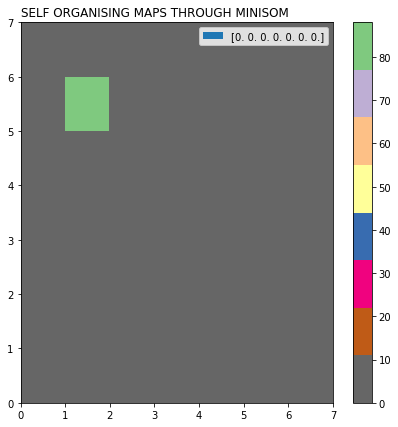

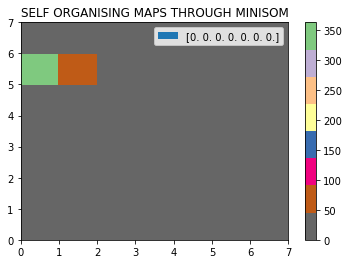

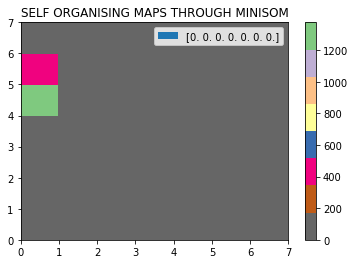

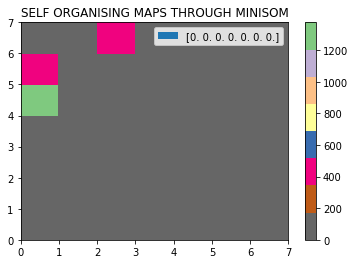

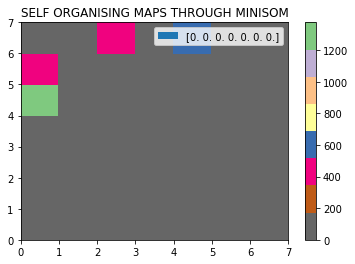

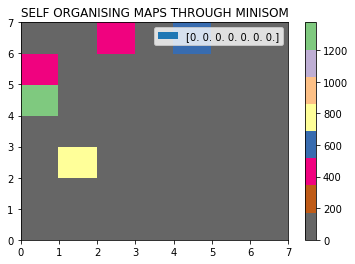

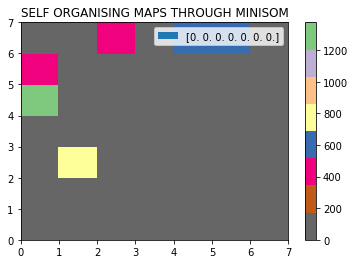

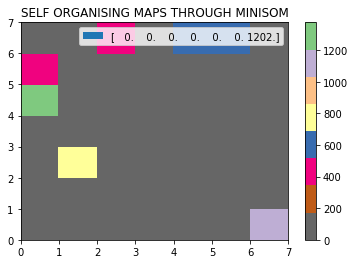

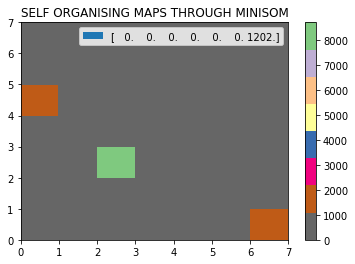

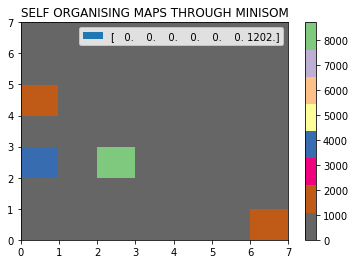

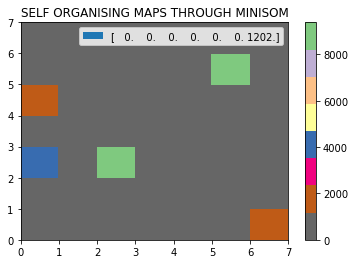

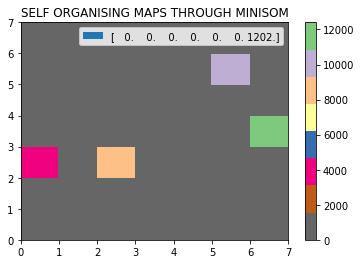

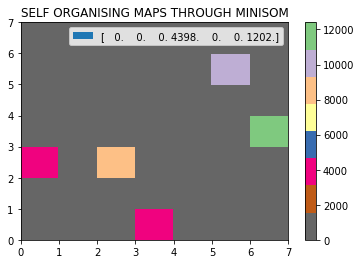

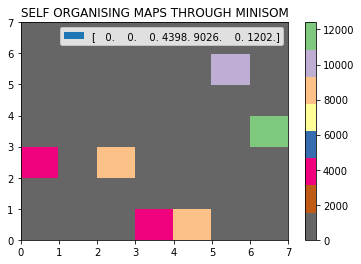

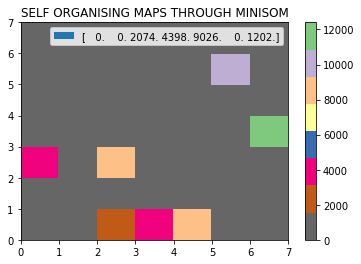

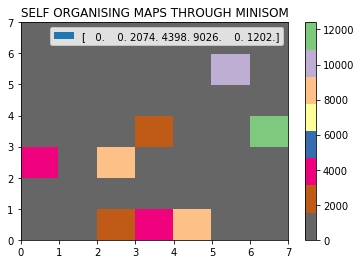

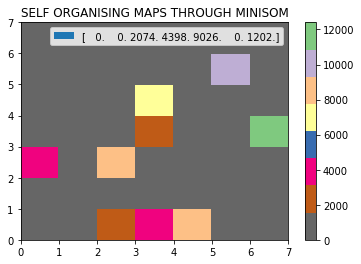

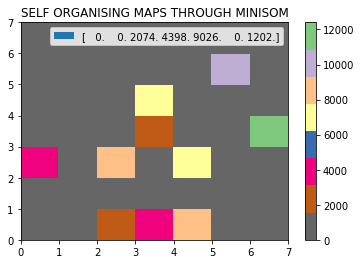

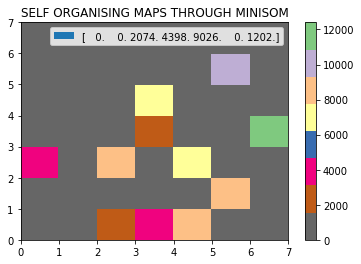

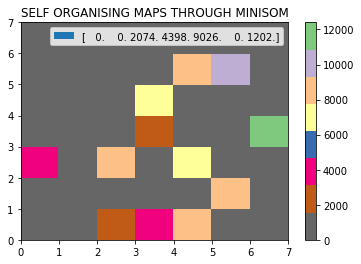

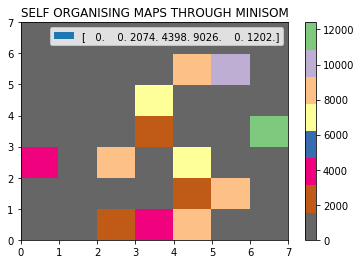

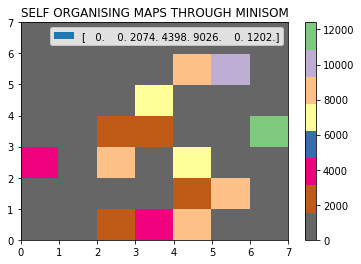

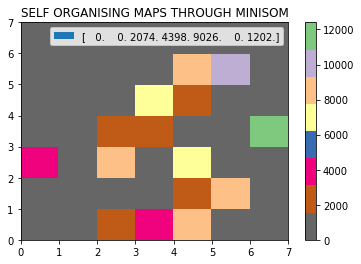

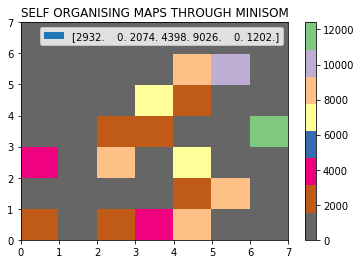

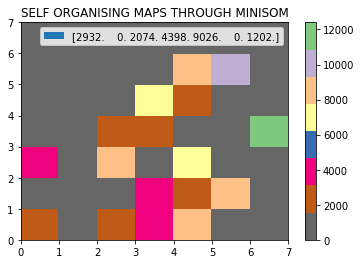

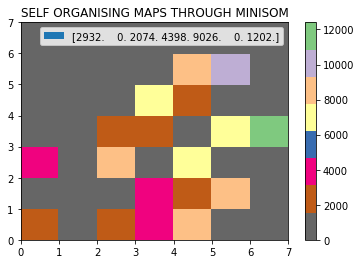

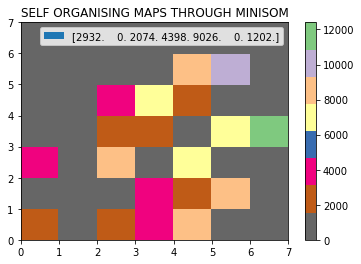

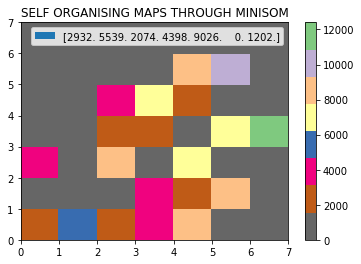

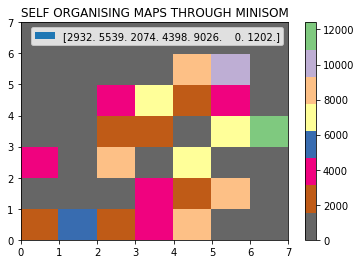

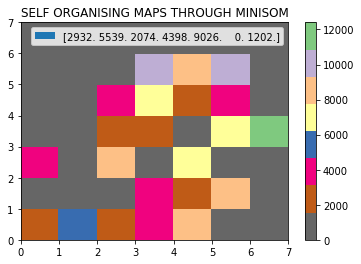

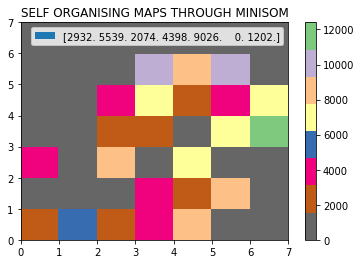

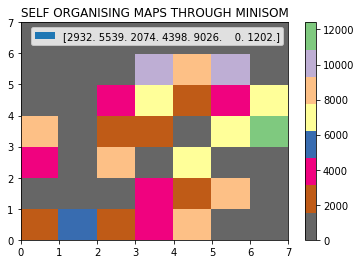

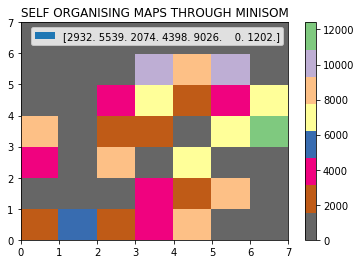

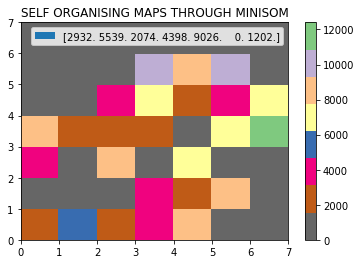

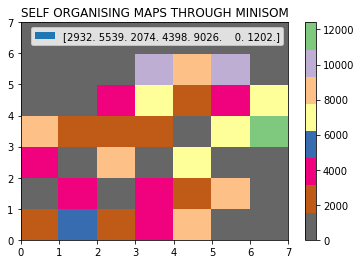

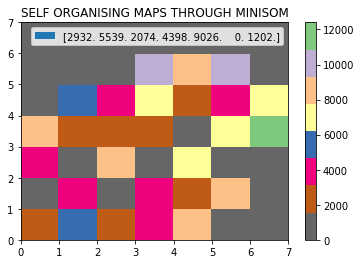

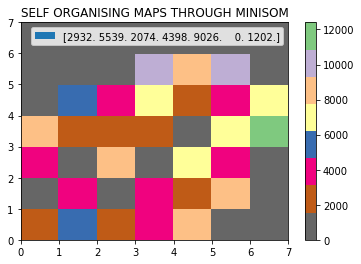

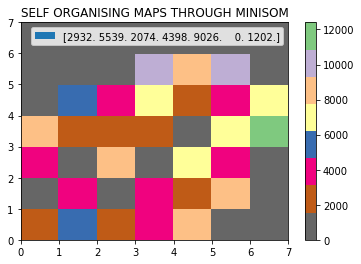

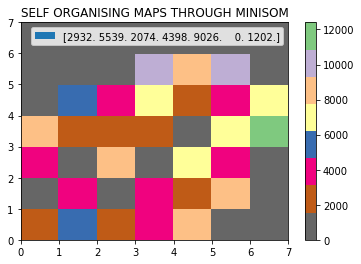

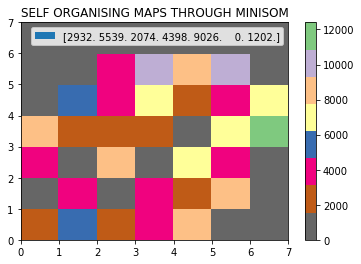

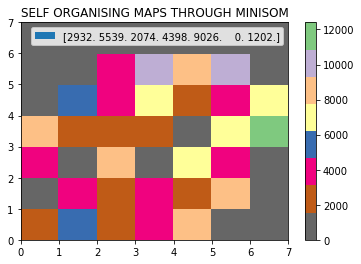

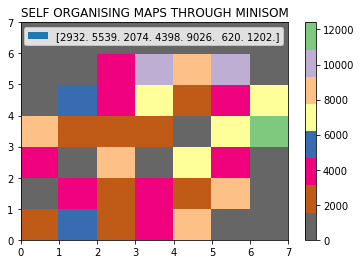

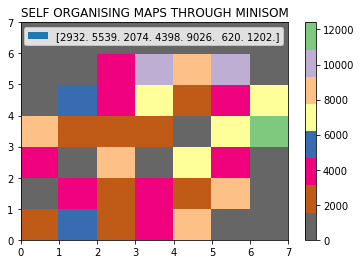

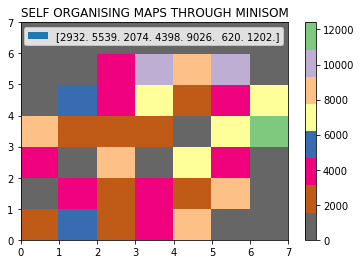

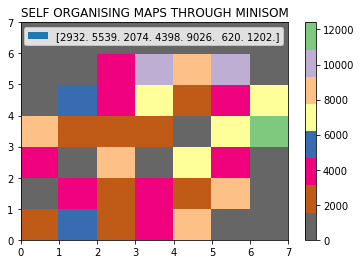

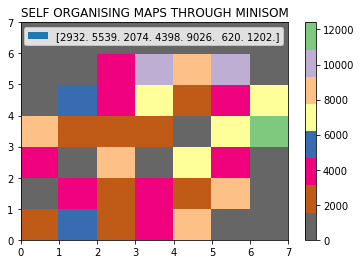

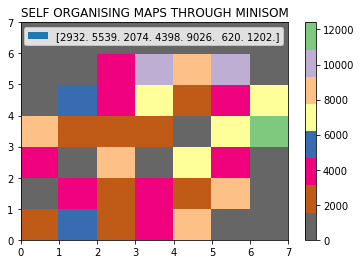

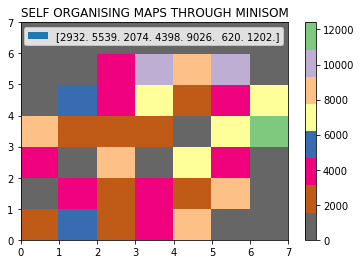

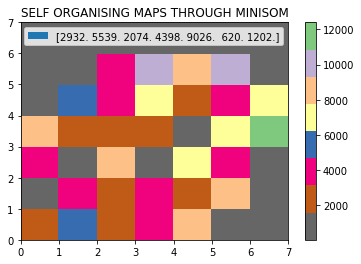

In [ ]:
plt.figure(figsize=(7,7))
frequencies=np.zeros((7,7))
for position,values in som.win_map(dataset.to_numpy()).items():
    frequencies[position[0],position[1]]=len(values)
    plt.pcolor(frequencies,cmap='Accent_r')
    plt.title(f'SELF ORGANISING MAPS THROUGH MINISOM', loc ='left')
    plt.legend(frequencies,ncol=15)
    plt.colorbar()
    plt.show()

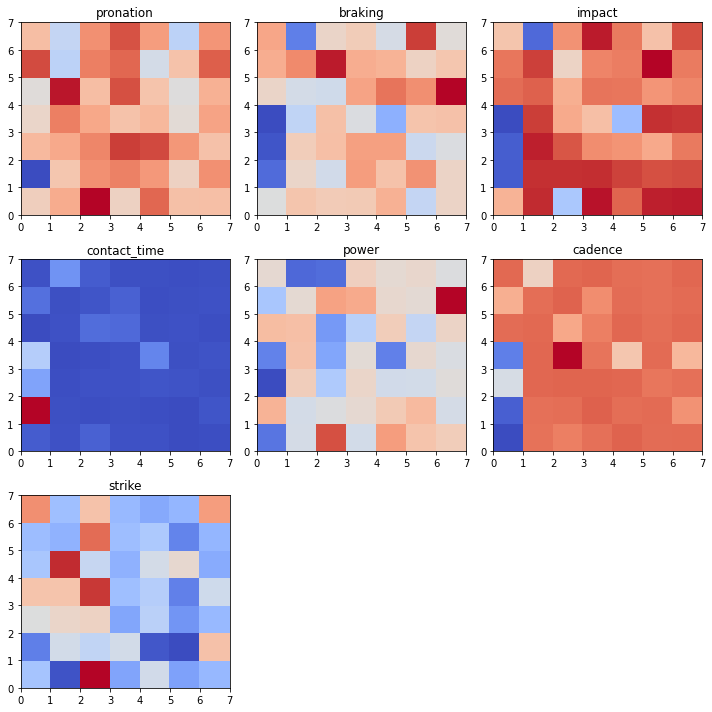

In [ ]:
size = 7
feature_names = ['pronation','braking','impact','contact_time','power','cadence','strike']

W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()